# Helpers

In [1]:

def text_clean(text, control):
    text = text.copy()

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    for i in range(len(text)):
        text[i] = extract_word(text[i])
        if control['lemmatize']:
            for j in range(len(text[i])):
                text[i][j] = lemmatizer.lemmatize(text[i][j])

    if control['stop_words']:
        for i in range(len(text)):
            for j in range(len(text[i])):
                if text[i][j] in stop_words:
                    text[i][j] = ""

    if control['remove_number']:
        for i in range(len(text)):
            for j in range(len(text[i])):
                if text[i][j].isnumeric():
                    text[i][j] = ""

    for i in range(len(text)):
        text[i] = ' '.join(text[i])

    vectorizer = CountVectorizer(max_df=0.8, min_df=3, ngram_range=(1,control['gram']))
    X = vectorizer.fit_transform(text)
    return vectorizer.get_feature_names(), X.toarray()

def generate_model(X, y, num_class):
    x_train_all, x_predict, y_train_all, y_predict = train_test_split(X, y, test_size=0.10, random_state=100)
    x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=100)
    train_data = lgb.Dataset(data=x_train, label=y_train)
    test_data = lgb.Dataset(data=x_test, label=y_test)
    param = {'num_leaves': 31, 'objective': 'multiclass', 'num_class':num_class}
    param['metric'] = 'multi_logloss'
    num_round = 10
    bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])
    # dd = bst.trees_to_dataframe()
    # print(dd)
    # graph = lgb.create_tree_digraph(bst)
    # graph.render()
    # return ["awd", "adw"]
    return bst

def get_features(aims, df):
    titles = df.columns.values.tolist()
    nlp = spacy.load("en_core_web_lg")
    new_aims = aims.copy()
    curr_feature = titles[0]
    for i in range(len(aims)):
        aim = word_pp(aims[i])
        doc1 = nlp(aim)
        best_sim = 0
        for title in titles:
            temp_t = word_pp(title)
            doc2 = nlp(temp_t)
            curr_sim = doc1.similarity(doc2)
            if curr_sim > best_sim:
                best_sim = curr_sim
                curr_feature = title
        new_aims[i] = curr_feature
    return new_aims


def word_pp(word):
    word = list(word)
    for i in range(len(word)):
        if word[i] in string.punctuation:
            word[i] = ' '
    return ''.join(word)

def extract_word(input_string):
    pu = string.punctuation
    for p in pu:
        input_string = input_string.replace(p, ' ')
    return input_string.lower().split()


# TODO: percentage way
def split_class(y, n):
    m = np.mean(y)
    y[y > m * 2] = m * 2
    sd = max(y) / n
    for i in range(len(y)):
        for j in range(n):
            if y[i] >= j * sd and y[i] <= (j + 1)*sd:
                y[i] = j


# Step 1: Data cleaning

In [2]:

def text_clean(text, control):
    text = text.copy()

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    for i in range(len(text)):
        text[i] = extract_word(text[i])
        if control['lemmatize']:
            for j in range(len(text[i])):
                text[i][j] = lemmatizer.lemmatize(text[i][j])

    if control['stop_words']:
        for i in range(len(text)):
            for j in range(len(text[i])):
                if text[i][j] in stop_words:
                    text[i][j] = ""

    if control['remove_number']:
        for i in range(len(text)):
            for j in range(len(text[i])):
                if text[i][j].isnumeric():
                    text[i][j] = ""

    for i in range(len(text)):
        text[i] = ' '.join(text[i])

    vectorizer = CountVectorizer(max_df=0.8, min_df=3, ngram_range=(1,control['gram']))
    X = vectorizer.fit_transform(text)
    return vectorizer.get_feature_names(), X.toarray()

def generate_model(X, y, num_class):
    x_train_all, x_predict, y_train_all, y_predict = train_test_split(X, y, test_size=0.10, random_state=100)
    x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=100)
    train_data = lgb.Dataset(data=x_train, label=y_train)
    test_data = lgb.Dataset(data=x_test, label=y_test)
    param = {'num_leaves': 31, 'objective': 'multiclass', 'num_class':num_class}
    param['metric'] = 'multi_logloss'
    num_round = 10
    bst = lgb.train(param, train_data, num_round, valid_sets=[test_data])
    # dd = bst.trees_to_dataframe()
    # print(dd)
    # graph = lgb.create_tree_digraph(bst)
    # graph.render()
    # return ["awd", "adw"]
    return bst

def get_features(aims, df):
    titles = df.columns.values.tolist()
    nlp = spacy.load("en_core_web_lg")
    new_aims = aims.copy()
    curr_feature = titles[0]
    for i in range(len(aims)):
        aim = word_pp(aims[i])
        doc1 = nlp(aim)
        best_sim = 0
        for title in titles:
            temp_t = word_pp(title)
            doc2 = nlp(temp_t)
            curr_sim = doc1.similarity(doc2)
            if curr_sim > best_sim:
                best_sim = curr_sim
                curr_feature = title
        new_aims[i] = curr_feature
    return new_aims


def word_pp(word):
    word = list(word)
    for i in range(len(word)):
        if word[i] in string.punctuation:
            word[i] = ' '
    return ''.join(word)

def extract_word(input_string):
    pu = string.punctuation
    for p in pu:
        input_string = input_string.replace(p, ' ')
    return input_string.lower().split()


# TODO: percentage way
def split_class(y, n):
    m = np.mean(y)
    y[y > m * 2] = m * 2
    sd = max(y) / n
    for i in range(len(y)):
        for j in range(n):
            if y[i] >= j * sd and y[i] <= (j + 1)*sd:
                y[i] = j


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#pip install contractions

In [5]:
# Load the Drive helper and mount
#from google.colab import drive
#import os
#drive.mount('/content/drive')


#os.chdir('/content/drive/My Drive/Colab Notebooks')

In [6]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import re
#!pip install sdv gensim unidecode contractions
import contractions
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
import nltk
nltk.download('punkt')# for the tokenize test
nltk.download('stopwords')# stopwords dict
nltk.download('wordnet')
nltk.download('omw-1.4') #Open Multilingual WordNet version 1.4

[nltk_data] Downloading package punkt to /Users/joseph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joseph/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/joseph/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
#path = "/content/drive/My Drive/mimic3.csv"
raw = pd.read_csv('data/mimi3.csv')['TEXT']
raw_df = raw.copy() #just dealing with the TEXT column

In [12]:
lemmatizer = WordNetLemmatizer() #word lemmatizer
proterstemmer = PorterStemmer() # word stemmer
raw_df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 18517 entries, 0 to 18516
Series name: TEXT
Non-Null Count  Dtype 
--------------  ----- 
18517 non-null  object
dtypes: object(1)
memory usage: 144.8+ KB


check for null value

In [13]:
raw_df.isnull().sum()

0

In [14]:
raw_df.head()

0    [**2153-9-4**] 9:16 AM\n CHEST (PORTABLE AP)  ...
1    [**2157-10-21**] 3:31 PM\n CT HEAD W/O CONTRAS...
2    4:30p-7a\nneuro: pt remained sedated on fent/v...
3    [**2131-5-24**] 9:45 AM\n PICC LINE PLACMENT S...
4    Respiratory Care\nPt intubated on ventilatory ...
Name: TEXT, dtype: object

In [15]:
# replace the non-character with " "
raw_df = raw_df.apply(lambda x:
             " ".join(re.sub(r'[^a-zA-Z]', " ", w).lower() for w in x.split()
             if re.sub(r'^a-zA-Z', ' ', w).lower() not in stopwords))

In [16]:
raw[0]

'[**2153-9-4**] 9:16 AM\n CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 58785**]\n Reason: assess lung expansion\n Admitting Diagnosis: CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n   71 year old man s/p CABG now w/chest tubes removed\n\n REASON FOR THIS EXAMINATION:\n  assess lung expansion\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATIONS:  Chest tubes removed.\n\n PORTABLE AP CHEST AT 1004:  Comparisons made to [**2153-9-3**].  The patient\n has been extubated.  Swan-Ganz catheter has been removed and the right IJ\n sheath remains in place.  Both left chest tubes have been removed.  There is\n no pneumothorax.  There is bilateral lower lobe atelectasis.  There is\n improvement in pulmonary edema.\n\n\n'

In [17]:
raw_df[0]

'                    chest  portable ap  clip      clip number  radiology           reason  assess lung expansion admitting diagnosis  coronary artery disease coronary artery bypass graft sda                                                                                   hospital      medical condition     year old man s p cabg w chest tubes removed reason examination  assess lung expansion                                                                                final report indications  chest tubes removed  portable ap chest       comparisons made                 patient extubated  swan ganz catheter removed right ij sheath remains place  left chest tubes removed  pneumothorax  bilateral lower lobe atelectasis  improvement pulmonary edema '

In [18]:
# deal with contraction
def decontracted(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def expand_contractions(phrase):
    """use contractions package to do decontraction"""
    phrase = contractions.fix(phrase)
    return phrase


# print(expand_contractions('won\'t')) -> will not
# print(decontracted('won\'t')) -> will not


### Data preprocessing

In [19]:
def preprocessing(notes):
    """
    preprocess notes including lemmatization, decontraction, stemming, lowercase,
    return notes(preprocessed notes), tokenized_notes(list)
    """
    tokenized_notes = []
    for i, text in enumerate(notes):
        notes[i] = decontracted(text) # here we use the decontracted function
        text_word_list = word_tokenize(text)

        # expand contraction
        text_word_list = [expand_contractions(word) for word in text_word_list]
        # lemmatization
        text_word_list = [lemmatizer.lemmatize(word) for word in text_word_list]
        # stemming
        text_word_list = [proterstemmer.stem(word) for word in text_word_list]
        # to lower
        text_word_list = [word.lower() for word in text_word_list]

        tokenized_notes.append(text_word_list)
        notes[i] = " ".join(text_word_list)
    return notes, tokenized_notes


In [20]:
notes_list, tokenized_notes = preprocessing(raw_df)

In [21]:
print(len(notes_list), "notes")

18517 notes


In [22]:
notes_list[0]

'chest portabl ap clip clip number radiolog reason ass lung expans admit diagnosi coronari arteri diseas coronari arteri bypass graft sda hospit medic condit year old man s p cabg w chest tube remov reason examin ass lung expans final report indic chest tube remov portabl ap chest comparison made patient extub swan ganz cathet remov right ij sheath remain place left chest tube remov pneumothorax bilater lower lobe atelectasi improv pulmonari edema'

# Step 2: sensitive factors

In [23]:
outcomes = ['length_of_stay_avg', 'Religion', 'Gender'] # selected these three predictors

# Step3: Identify sensitive outcome(s) to protect


In [24]:
import sys
sys.path.insert(0,'/Users/joseph/Desktop/Datasifter') #to use the function that we made

In [25]:
%pip install lightgbm
import lightgbm as lgb
from matplotlib import pyplot as plt
%pip install spacy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
!python -m spacy download en_core_web_lg # had a problem with jupyter, but I used virtual env. so if you are not using vitual env, you may try in jupyter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 7.3 MB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [27]:
consider_text = True # consider text OR features
num_keywords = 10 # num keywords generated
drop_list = [0, 2, 4, 5, 6] # useless df features
num_class = 5 # for continuous outcomes
control = {'remove_number': True, 'lemmatize': True, 'normalize': True, 'stop_words': True, 'gram': 1, 'remove_name': True}
# read data frame
df = pd.read_csv('data/mimi3.csv')
df = df.drop(df.columns[drop_list], axis=1)
# get all categorical columns
cat_columns = df.select_dtypes(['object']).columns
# convert all categorical columns to numeric
df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18517 entries, 0 to 18516
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SUBJECT_ID                   18517 non-null  int64  
 1   length_of_stay_avg           18517 non-null  float64
 2   Platelet.Count               18517 non-null  float64
 3   Prothrombin.time             18517 non-null  float64
 4   WBC                          18517 non-null  float64
 5   Hemoglobin                   18517 non-null  float64
 6   PTT                          18517 non-null  float64
 7   GCS...Verbal.Response        18517 non-null  int64  
 8   Language                     18517 non-null  int64  
 9   GCS...Motor.Response         18517 non-null  int64  
 10  GCS...Eye.Opening            18517 non-null  int64  
 11  INR                          18517 non-null  float64
 12  Religion                     18517 non-null  int64  
 13  Patient.Location

In [28]:
# change text to preprocessed text
df['TEXT'] = notes_list

In [32]:
# detect outcome column

import functions
#import en_core_web_sm

#nlp = en_core_web_sm.load()
import spacy.cli

spacy.cli.download("en_core_web_lg")
import spacy
import en_core_web_lg
outcomes = functions.get_features(outcomes, df)

zsh:1: command not found: import
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 7.0 MB/s eta 0:00:0000:0100:02
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [33]:
#!conda install -c conda-forge spacy-model-en_core_web_lg--y

In [34]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [35]:
#pip install en_core_web_lg

In [36]:
#!python -m spacy download en_core_web_lg
#!/Users/suhyunjung/.pyenv/versions/3.9.16/lib/python3.9 -m spacy download en_core_web_lg

In [37]:
import spacy
from spacy.lang.en.examples import sentences

In [38]:
nlp = spacy.load("en_core_web_lg")

---

### Implementing lightGBM

In [39]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [40]:
np.array(df[outcomes[0]])

array([ 6.13229167,  6.13229167, 10.36388889, ..., 17.75      ,
        7.67291667,  7.67291667])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 12591, number of used features: 72
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -7.831300
[LightGBM] [Info] Start training from score -6.396215
[LightGBM] [Info] Start training from score -4.866027
[LightGBM] [Info] Start training from score -4.051666
[LightGBM] [Info] Start training from score -3.802383
[LightGBM] [Info] Start training from score -3.356238
[LightGBM] [Info] Start training from score -3.500566
[LightGBM] [Info] Start training from score -3.398105
[LightGBM] [Info] Start training from score -3.370000
[LightGBM] [Info] Start training from score -3.256589
[LightGBM] [Info] Start training from score -3.281642

[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

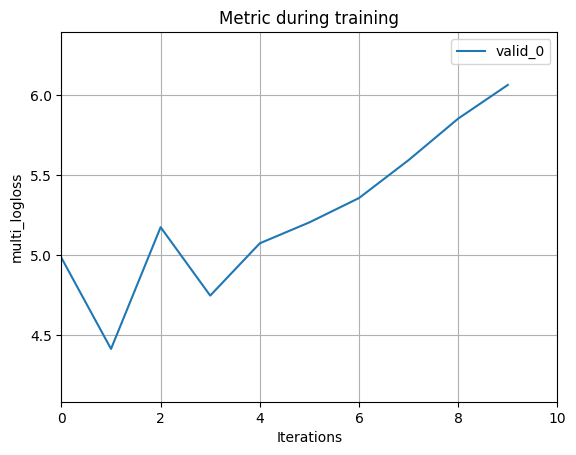

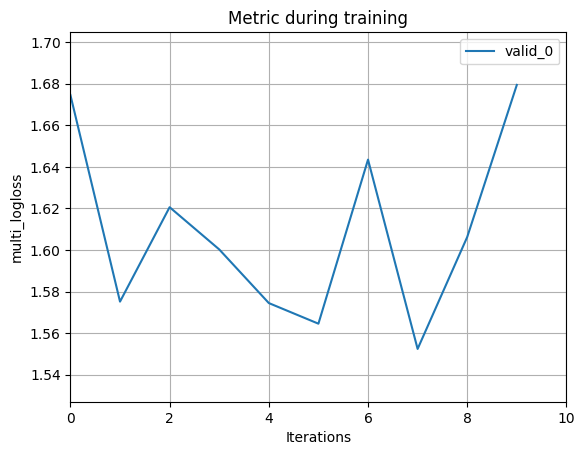

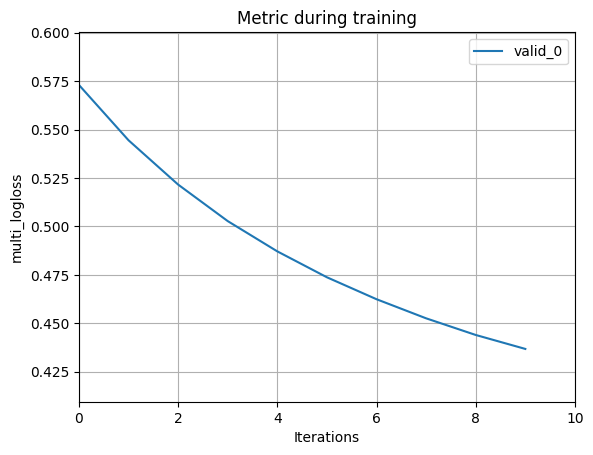

In [47]:
keywords = {} # to get a feture importance result (final result from LightGBM)
for outcome in outcomes:
    y = np.array(df[outcome])
    num_class = len(np.unique(y))
    X = np.array(df['TEXT'])
    #vectorizer = CountVectorizer(max_df=0.8, min_df=3, ngram_range=(1,control['gram']))
    vectorizer = CountVectorizer(min_df=0.2, ngram_range=(1,1)) # unigrams
    X = vectorizer.fit_transform(notes_list).toarray() #This converts the text data into a matrix that machine learning algorithms can work with.
    name= vectorizer.get_feature_names_out() # if your sklear version is diff use 'vectorizer.get_feature_names()


    x_train_all, x_predict, y_train_all, y_predict = train_test_split(X, y, test_size=0.15, random_state=100)
    x_train, x_test, y_train, y_test = train_test_split(x_train_all, y_train_all, test_size=0.2, random_state=100)
    train_data = lgb.Dataset(data=x_train, label=y_train)
    test_data = lgb.Dataset(data=x_test, label=y_test)
    param = {'num_leaves': 31, 'objective': 'multiclass', 'num_class':num_class}
    param['metric'] = 'multi_logloss'
    num_round = 10
    evals = {}
    model = lgb.train(param, train_data, num_round, valid_sets=[test_data], callbacks= [lgb.record_evaluation(evals)])
    # dd = bst.trees_to_dataframe()
    #     if consider_text:
    #         name, X = text_clean(np.array(df['TEXT']), control)
    #         print(X.shape)
    #         break
    #         if control['normalize']:
    #             X = (X - X.mean(axis=0)) / X.std(axis=0)
    #     else:
    #         temp_df = df.drop(['TEXT'], axis=1)
    #         X = np.array(temp_df.drop(outcome, axis=1))
    #         name= np.array(temp_df.columns)

    # model = generate_model(X, y, num_class)
    feature_imp = pd.DataFrame({"value": model.feature_importance(), 'Feature': vectorizer.get_feature_names_out()})
    keywords[outcome] = pd.DataFrame(feature_imp.sort_values(by=feature_imp.columns[0], ascending=False)[0:num_keywords])
    lgb.plot_metric(evals)


In [48]:
import pickle
with open('keywords.pkl', 'wb') as f:
    pickle.dump(keywords, f)

In [49]:
#with open('keywords.pkl', 'rb') as f:
#    loaded_dict = pickle.load(f)

In [50]:
outcomes

['length_of_stay_avg', 'Religion', 'Gender']

In [51]:
# words significantly predicts sensitive factor: Religion
# before preprocessing
keywords[outcomes[2]]

,value,Feature
69,36,tube
4,36,assess
71,30,year
27,24,histori
40,20,mg
38,20,man
14,18,continu
60,18,remain
59,18,reason
30,18,impress


In [52]:
# after preprocessing
keywords[outcomes[2]]

,value,Feature
69,36,tube
4,36,assess
71,30,year
27,24,histori
40,20,mg
38,20,man
14,18,continu
60,18,remain
59,18,reason
30,18,impress


# Step 4: semantic radius, using word2Vec

In [53]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [55]:
%pip install gensim
from gensim.models import Word2Vec
import random

from pyparsing import WordStart

class MySentences(object): #It splits each sentence into words and yields them as separate tokens. The class also implements methods for length retrieval and item retrieval, which allows treating an instance of this class as a list-like object.
    def __init__(self, text):
        self.text = text

    def __iter__(self):
        for line in self.text:
            yield line.split()

    def __len__(self):
        return len(self.text)

    def __getitem__(self, i):
        return self.text[i]

    def __setitem__(self, index, item1):
        self.text[index] = item1

class W2V(object):
    def __init__(self, sentences, cores, vec_size) -> None:
        self.sentences = sentences
        self.model = Word2Vec(min_count=10,
                     window=10,
                     vector_size=vec_size,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

    def train(self):
        self.model.build_vocab(self.sentences)
        self.model.train(self.sentences, total_examples=self.model.corpus_count, epochs=30, report_delay=1)

    def get_similar_word(self, keywords=["wife"], start_radius=0, end_radius=100): # Returns a random similar word for each keyword within the specified radius range. It queries the model for the most similar words to each keyword.
        word_list = [self.model.wv.most_similar(keywords[i], topn=end_radius)[start_radius:] for i in range(len(keywords))]
        return [random.choice(words)[0] for words in word_list]

    def get_similar_word_2(self, keywords=["wife"], start_radius=0, end_radius=100): # it returns a list of lists of similar words for each keyword. It doesn't choose a random word from each list.
        #print(len(keywords))
        #print(self.model.wv.most_similar(keywords[i], topn=end_radius))
        word_list = [self.model.wv.most_similar(keywords[i], topn=end_radius)[start_radius:] for i in range(len(keywords))]
        return word_list


    def get_similar_word_list(self, keywords, start_radius = 0, end_radius = 100):
        if isinstance(keywords, list):
            TypeError("keywords should be a list")
        else:
            keywords = [keywords]
            for keyword in keywords:
                word_list = self.model.wv.most_similar(keyword, topn = end_radius)
        return word_list


    def save(self, route): #Saves the trained Word2Vec model
        self.model.save(route)

    def load(self, route): #loads the trained Word2Vec model
        self.model = Word2Vec.load(route)

    def find_word_idx(self, keywords=["wife"]): #Finds the indices of sentences containing each keyword in the provided list of keywords.
        return [[i for i in range(len(self.sentences)) if keywords[j] in self.sentences[i]] for j in range(len(keywords))]

    def obfuscate(self, sentence, keywords=["wife"]): #Replaces keywords in a sentence with similar words obtained from the model.
        word_list = self.get_similar_word(keywords=keywords)
        for i in range(len(keywords)):
            sentence = sentence.replace(keywords[i], word_list[i])
        return sentence




  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/63/46/5feab9c524a380bfa9f9f1c0d065743280dca30b216ab4c7a231f22dbed7/gensim-4.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached gensim-4.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.3 kB)
Using cached gensim-4.3.2-cp311-cp311-macosx_11_0_arm64.whl (24.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [61]:
sentences = MySentences(df.TEXT)

In [62]:
w2v_model = W2V(sentences, 1, 300) # sentences , core, vec_size

In [63]:
w2v_model.train()

In [64]:
w2v_model.save("w2vmodel")

In [65]:
#from google.colab import files
#uploaded = files.upload()

In [66]:
import pickle
with open('keywords.pkl', 'rb') as f:
    keywords = pickle.load(f)

---
Now we want to find the maximum distance to determine the semantic radius, here we first find the statistics summary for each keywords in terms of one sensitive outcome

E.g:

when the most predictive words for the Religion is "assessment", then the most similiar words ranking list of assessment is stored in the "similar_assessment", we find the first 100 words and find the mean, median, 25%IQ .etc statistics summary, then cancanate them to the keywords for each sensitive outcome





In [67]:
print(outcomes)

['length_of_stay_avg', 'Religion', 'Gender']


In [68]:
#store the first 10 most predictive words for each sensitive outcomes

# length_of_stay_avg
LOSA_keywords = keywords[outcomes[0]]
# Gender
Gender_keywords = keywords[outcomes[1]]
# Religion
Religion_keywords = keywords[outcomes[2]]

LOSA_list = list(LOSA_keywords.Feature)
Gender_list = list(Gender_keywords.Feature)
Religion_list = list(Religion_keywords.Feature)
# LOS_list = list(LOS_keywords.Feature)
# LOS_list.pop(3)

# Gender_list = list(Gender_keywords.Feature)
# Gender_list.pop(-2)

# Religion_list = list(Religion_keywords.Feature)
# Religion_list.pop(6)
# Religion_list.pop()

In [69]:
keywords_dict = {}
keywords_dict.setdefault(outcomes[0], LOSA_list)
keywords_dict.setdefault(outcomes[1], Gender_list)
keywords_dict.setdefault(outcomes[2], Religion_list)


['tube',
 'assess',
 'year',
 'histori',
 'mg',
 'man',
 'continu',
 'remain',
 'reason',
 'impress']

In [70]:
def find_3levels_word(keyword_list, small = 33, mid = 66):
    """"keywords is a list of predictive words of a certain outcome,
    small is the percentile criteria for small level of obfuscation,
    mid is the percentile criteria for mid level of obfuscation,

    return are 3 word list: each derived by random sampling from the corresponding obfuscation level"""

    small_level_list = []
    mid_level_list = []
    large_level_list = []
    for word in keyword_list:
        try:
            similar_words = sorted(w2v_model.get_similar_word_list(keywords = word, end_radius = 100), key = lambda x: x[1], reverse = True)
        except:
            continue
        else:
            word_list, cos_list = list(zip(*similar_words)) #instead of spliting by the number use cdf // make it visible with some metrics //change the number of keywords 10 -> bigger
            small_range = word_list[:small]# begin ~ small
            mid_range = word_list[small:mid] #small ~ mid
            large_range = word_list[mid:] # mid ~ end
            small_level_list.append(random.sample(small_range,1)[0])
            mid_level_list.append(random.sample(mid_range,1)[0])
            large_level_list.append(random.sample(large_range,1)[0])

    return small_level_list, mid_level_list, large_level_list




In [71]:
def get_replace_word(keywords, level, small = 33, mid = 66):
    if isinstance(level, str):
        small, mid, large = find_3levels_word(keywords, small, mid)
        level = level.lower()
        if level == "small":
            return small
        elif level == "mid":
            return mid
        elif level == "large":
            return large
    else: NotImplemented

In [72]:
keywords_dict['Gender'] #this is original 10 keywords from Gender that we are going to change

['tube',
 'assess',
 'year',
 'histori',
 'mg',
 'man',
 'continu',
 'remain',
 'reason',
 'impress']

In [73]:
get_replace_word(keywords_dict['Gender'], 'small') # obfuscation with small_list words for Gender 10keywords

['guiaic',
 'vpace',
 'met',
 'shaft',
 'orif',
 'radio',
 'dysynchron',
 'coag',
 'secreat',
 'appendag']

In [74]:
outcomes

['length_of_stay_avg', 'Religion', 'Gender']

In [75]:
print(len(get_replace_word(keywords_dict['Gender'], "small")), "\n",
      get_replace_word(keywords_dict['Gender'], "small"), "\n\n",
     len(get_replace_word(keywords_dict['Gender'], "mid")), "\n",
      get_replace_word(keywords_dict['Gender'], "mid"), "\n\n",
     len(get_replace_word(keywords_dict['Gender'], "large")), "\n",
      get_replace_word(keywords_dict['Gender'], "large"),)

10 
 ['autolog', 'ect', 'lurt', 'both', 'avl', 'complain', 'bb', 'atr', 'calm', 'elev'] 

 10 
 ['fsb', 'cadaver', 'ceftaz', 'labetolol', 'urin', 'lobar', 'pot', 'lg', 'enterococcu', 'sacroiliac'] 

 10 
 ['sustain', 'pacu', 'abrupt', 'tremor', 'bore', 'some', 'vasopressor', 'caus', 'np', 'case']


In [76]:
pd.DataFrame({'keywords':keywords_dict['Religion'],
             'small_level':get_replace_word(keywords_dict['Religion'], "small"),
             'mid_level':get_replace_word(keywords_dict['Religion'], "mid"),
             'large_level':get_replace_word(keywords_dict['Religion'], "large")})

,keywords,small_level,mid_level,large_level
0,name,stabli,gate,unabl
1,pt,wardnam,ing,exert
2,chang,flatten,reflect,cyst
3,effus,precaut,cathet,everyth
4,left,glargin,laminectomi,grew
5,tube,nodular,sheath,goiter
6,right,copiu,mm,serosangin
7,pain,alkalot,valv,cardiomyopathi
8,hr,mvi,tuberculosi,sling
9,pm,aneursym,uffp,dk


In [77]:
pd.DataFrame({'keywords':keywords_dict['Gender'],
             'small_level':get_replace_word(keywords_dict['Gender'], "small"),
             'mid_level':get_replace_word(keywords_dict['Gender'], "mid"),
             'large_level':get_replace_word(keywords_dict['Gender'], "large")})

,keywords,small_level,mid_level,large_level
0,tube,osa,disku,lpm
1,assess,averag,mucomyst,ucx
2,year,colonoscopi,name,cont
3,histori,opioid,follw,inconsist
4,mg,process,with,pancytopenia
5,man,coffe,uncertain,insuffici
6,continu,sulbactam,jet,job
7,remain,confus,watch,remnant
8,reason,anxieti,pill,compart
9,impress,elev,accumul,endotrach


In [78]:
print(len(keywords_dict['length_of_stay_avg']))
print(len(get_replace_word(keywords_dict['length_of_stay_avg'], "small")),
len(get_replace_word(keywords_dict['length_of_stay_avg'], "mid")),
len(get_replace_word(keywords_dict['length_of_stay_avg'], "large")))
print(keywords_dict['length_of_stay_avg'])

10
10 10 10
['pt', 'chang', 'tube', 'right', 'name', 'left', 'chest', 'failur', 'remain', 'hr']


In [79]:
# # ! pip install wikipedia2vec
# from wikipedia2vec import Wikipedia2Vec
# wiki2vec = Wikipedia2Vec.load("enwiki_20180420_100d.pkl")
# wiki2vec.most_similar(wiki2vec.get_word("tarch"), 100)[1:]
# keywords_dict['length_of_stay_avg']
# sorted([(i[0].text, i[1]) for i in wiki2vec.most_similar(wiki2vec.get_word("tarch"), 101)[1:]], key = lambda x:x[1], reverse = True)
# # wiki2vec.most_similar(wiki2vec.get_word('yoda'), 5)
# def find_3levels_word_pretrained(keyword_list, small = 33, mid = 66):
#     """"keywords is a list of predictive words of a certain outcome,
#     small is the percentile criteria for small level of obfuscation,
#     mid is the percentile criteria for mid level of obfuscation,

#     return are 3 word list: each derived by random sampling from the corresponding obfuscation level"""

#     small_level_list = []
#     mid_level_list = []
#     large_level_list = []
#     for word in keyword_list:
# #         try:
# #             similar_words = sorted([(i[0].text, i[1]) for i in wiki2vec.most_similar(wiki2vec.get_word(word), 100)[1:101]], key = lambda x:x[1], reverse = True)
# #             similar_words = sorted(wiki2vec.get_similar_word_list(keywords = word, end_radius = 100), key = lambda x: x[1], reverse = True)
# #         except:

# #         else:
#         similar_words = sorted([(i[0].text, i[1]) for i in wiki2vec.most_similar(wiki2vec.get_word(word), 100)[1:101]], key = lambda x:x[1], reverse = True)
#         print(word)
#         word_list, cos_list = list(zip(*similar_words))
#         small_range = word_list[:small]
#         mid_range = word_list[small:mid]
#         large_range = word_list[mid:]

#         small_level_list.append(random.sample(small_range,1)[0])
#         mid_level_list.append(random.sample(mid_range,1)[0])
#         large_level_list.append(random.sample(large_range,1)[0])
#         print(small_level_list)

#     return small_level_list, mid_level_list, large_level_list

# def get_replace_word(keywords, level, small = 33, mid = 66):
#     if isinstance(level, str):
#         small, mid, large = find_3levels_word_pretrained(keywords, small, mid)
#         level = level.lower()
#         if level == "small":
#             return small
#         elif level == "mid":
#             return mid
#         elif level == "large":
#             return large
#     else: NotImplemented

# # find_3levels_word_pretrained(keywords_dict['length_of_stay_avg'])
# get_replace_word(keywords_dict['length_of_stay_avg'], "small")


In [81]:
# use google news trained w2v
import gensim
model = gensim.models.keyedvectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [82]:
sorted(model.similar_by_word(word = keywords_dict['length_of_stay_avg'][0], topn = 10),
                                   key = lambda x: x[1], reverse = True)

[('stls', 0.5360503792762756),
 ('rbds', 0.5249072909355164),
 ('w', 0.519607663154602),
 ('2pt', 0.513253927230835),
 ('rbs', 0.5095221996307373),
 ('pts', 0.5054894685745239),
 ('RPM_ASM', 0.5014232397079468),
 ('R.Williams', 0.49798235297203064),
 ('3pt', 0.49516722559928894),
 ('sv', 0.4927876889705658)]

In [83]:
# wiki2vec.most_similar(wiki2vec.get_word("tarch"), 100)[1:]
# keywords_dict['length_of_stay_avg']

def find_3levels_word_GN(keyword_list, small = 33, mid = 66):
    """"keywords is a list of predictive words of a certain outcome,
    small is the percentile criteria for small level of obfuscation,
    mid is the percentile criteria for mid level of obfuscation,

    return are 3 word list: each derived by random sampling from the corresponding obfuscation level"""

    small_level_list = []
    mid_level_list = []
    large_level_list = []
    for word in keyword_list:
        try:
            similar_words = sorted(model.similar_by_word(word = keywords_dict['length_of_stay_avg'][0], topn = 100),
                                   key = lambda x: x[1], reverse = True)
        except:
            continue
        else:
            word_list, cos_list = list(zip(*similar_words))
            small_range = word_list[:small]
            mid_range = word_list[small:mid]
            large_range = word_list[mid:]
            small_level_list.append(random.sample(small_range,1)[0])
            mid_level_list.append(random.sample(mid_range,1)[0])
            large_level_list.append(random.sample(large_range,1)[0])

    return small_level_list, mid_level_list, large_level_list


def get_replace_word_GN(keywords, level, small = 33, mid = 66):
    if isinstance(level, str):
        small, mid, large = find_3levels_word_GN(keywords, small, mid)
        level = level.lower()
        if level == "small":
            return small
        elif level == "mid":
            return mid
        elif level == "large":
            return large
    else: NotImplemented

In [84]:
keywords_dict[outcomes[0]]

['pt',
 'chang',
 'tube',
 'right',
 'name',
 'left',
 'chest',
 'failur',
 'remain',
 'hr']

In [85]:
def generate_words_for_replacement(keywords_dictionary):
    """input:
    keywords_dict: dictionary, with key = sensitive factor, value = predictive words of that factor
    return the data frame containing the words for replacement of each sensitive factor"""
    words_for_replacement = {}
    for key, item in keywords_dictionary.items():
        words_for_replacement[key] = pd.DataFrame({'keywords':keywords_dictionary[key],
             'small_level':get_replace_word_GN(keywords_dictionary[key], "small"),
             'mid_level':get_replace_word_GN(keywords_dictionary[key], "mid"),
             'large_level':get_replace_word_GN(keywords_dictionary[key], "large")})



    return words_for_replacement

In [86]:
a = generate_words_for_replacement(keywords_dict)

In [87]:
a[outcomes[2]]

,keywords,small_level,mid_level,large_level
0,tube,asts,..........,é_o
1,assess,asts,t8,p
2,year,lj,@_sportsguy##,coord
3,histori,w/##,fg,supra_§
4,mg,sv,7r,cg
5,man,rbs,FIRST_PERIOD,Elmhurst_............
6,continu,sv,ECap,ht_ft
7,remain,R.Williams,nxt,coord
8,reason,asts,3PA,Elmhurst_............
9,impress,3pt,7r,J.Jones


# Step 5: Replace words

In [88]:
wordsReplacement = generate_words_for_replacement(keywords_dict)

In [146]:
wordsReplacement[outcomes[0]]

,keywords,small_level,mid_level,large_level
0,pt,w/##,lk,p
1,chang,srv,@_sportsguy##,Elmhurst_............
2,tube,:3,nxt,Long_Wittenham_Res
3,right,lj,3PA,Opp'n
4,name,rbds,qt,3PT
5,left,atts,pg,alt_Sec
6,chest,PM_CC,nxt,J.Jones
7,failur,¼_l,",8",cg
8,remain,3pt,FIRST_PERIOD,#-##.#.#
9,hr,PM_CC,THIRD_PERIOD,"+###,###_bbl"


In [166]:
wordsReplacement[outcomes[2]]

,keywords,small_level,mid_level,large_level
0,tube,dpa_db,:4,J.Jones
1,assess,dpa_ds,pg,INSTANT_VIEW
2,year,dpa_db,Unassisted_..............................,lv
3,histori,gls,3PA,sl
4,mg,Sensex_dips,#.##pts,"L_,4"
5,man,dpa_cb,",8",cg
6,continu,SECOND_PERIOD,FIRST_PERIOD,lv
7,remain,SECOND_PERIOD,pk,jrw
8,reason,dpa_cb,Unassisted_..............................,ht_ft
9,impress,rbds,:4,p


In [179]:
def obfuscate(notes, wordForReplacement, level, sensitive_factor):
    """wordForReplacement: dictionary containing all senstitive factors and their corresponding words for replacement
    level: obfuscation level (small, mid, large)
    sensitive_factor: obfuscation factor (outcomes)"""
    wordForReplacement = wordsReplacement.copy()
#     sensitive_factor = "Religion"
    all_note = notes.copy()
    for i, note in enumerate(all_note):
        replace_dict = {}
        for word in note.split():
#             print(word)
#             print(list(wordForReplacement[sensitive_factor]['keywords']))
            curr_word = lemmatizer.lemmatize(word).lower()
            if curr_word in list(wordForReplacement[sensitive_factor]['keywords']):
                if level == "small":
#                     print("curr_word:", curr_word)
                    potential_words = wordForReplacement[sensitive_factor]
                    word_for_replace = potential_words[potential_words['keywords'] == curr_word]['small_level'].values[0]
#                     print("word_for_replace", word_for_replace)
                    replace_dict[curr_word] = word_for_replace
                if level == "medium":
                    potential_words = wordForReplacement[sensitive_factor]
                    word_for_replace = potential_words[potential_words['keywords'] == curr_word]['mid_level'].values[0]
                    replace_dict[curr_word] = word_for_replace
                if level == "large":
                    potential_words = wordForReplacement[sensitive_factor]
                    word_for_replace = potential_words[potential_words['keywords'] == curr_word]['large_level'].values[0]
                    replace_dict[curr_word] = word_for_replace
#       all_note[i] = re.sub(curr_word, word_for_replace, note)
        #print(replace_dict)
        for target, replace in replace_dict.items():
            note = note.replace(target, replace)
#             re.sub(target, replace, note)
        all_note[i] = note

    return all_note





In [148]:
# original
raw[0]

'[**2153-9-4**] 9:16 AM\n CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 58785**]\n Reason: assess lung expansion\n Admitting Diagnosis: CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n   71 year old man s/p CABG now w/chest tubes removed\n\n REASON FOR THIS EXAMINATION:\n  assess lung expansion\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATIONS:  Chest tubes removed.\n\n PORTABLE AP CHEST AT 1004:  Comparisons made to [**2153-9-3**].  The patient\n has been extubated.  Swan-Ganz catheter has been removed and the right IJ\n sheath remains in place.  Both left chest tubes have been removed.  There is\n no pneumothorax.  There is bilateral lower lobe atelectasis.  There is\n improvement in pulmonary edema.\n\n\n'

In [149]:
obfuscate([raw[0]], wordsReplacement, "small", outcomes[1])[0]

'[**2153-9-4**] 9:16 AM\n CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 58785**]\n Reason: assess lung expansion\n Admitting Diagnosis: CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n   71 year old man s/p CABG now w/chest stlss removed\n\n REASON FOR THIS EXAMINATION:\n  assess lung expansion\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATIONS:  Chest stlss removed.\n\n PORTABLE AP CHEST AT 1004:  Comparisons made to [**2153-9-3**].  The patient\n has been extubated.  Swan-Ganz catheter has been removed and the gls IJ\n sheath remains in place.  Both lj chest stlss have been removed.  There is\n no pneumothorax.  There is bilateral lower lobe atelectasis.  There is\n improvement in pulmonary edema.\n\n\n'

In [94]:
outcomes

['length_of_stay_avg', 'Religion', 'Gender']

In [95]:
print(raw[0])

[**2153-9-4**] 9:16 AM
 CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 58785**]
 Reason: assess lung expansion
 Admitting Diagnosis: CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA
 ______________________________________________________________________________
 [**Hospital 2**] MEDICAL CONDITION:
   71 year old man s/p CABG now w/chest tubes removed

 REASON FOR THIS EXAMINATION:
  assess lung expansion
 ______________________________________________________________________________
                                 FINAL REPORT
 INDICATIONS:  Chest tubes removed.

 PORTABLE AP CHEST AT 1004:  Comparisons made to [**2153-9-3**].  The patient
 has been extubated.  Swan-Ganz catheter has been removed and the right IJ
 sheath remains in place.  Both left chest tubes have been removed.  There is
 no pneumothorax.  There is bilateral lower lobe atelectasis.  There is
 improvement in pulmonary edema.





In [152]:
print(obfuscate([raw[0]], wordsReplacement, "small", outcomes[1]))

['[**2153-9-4**] 9:16 AM\n CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 58785**]\n Reason: assess lung expansion\n Admitting Diagnosis: CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n   71 year old man s/p CABG now w/chest stlss removed\n\n REASON FOR THIS EXAMINATION:\n  assess lung expansion\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATIONS:  Chest stlss removed.\n\n PORTABLE AP CHEST AT 1004:  Comparisons made to [**2153-9-3**].  The patient\n has been extubated.  Swan-Ganz catheter has been removed and the gls IJ\n sheath remains in place.  Both lj chest stlss have been removed.  There is\n no pneumothorax.  There is bilateral lower lobe atelectasis.  There is\n improvement in pulmonary edema.\n\n\n']


In [177]:
arr_small =[]
for r in raw:
    arr_small.append(obfuscate([r], wordsReplacement, "small", outcomes[1]))
df_small = pd.DataFrame(arr_small, columns=['TEXT'])

In [180]:
arr_med =[]
for r in raw:
    arr_med.append(obfuscate([r], wordsReplacement, "medium", outcomes[1]))
df_medium = pd.DataFrame(arr_med, columns=['TEXT'])

In [181]:
arr_large =[]
for r in raw:
    arr_large.append(obfuscate([r], wordsReplacement, "large", outcomes[1]))
df_large = pd.DataFrame(arr_large, columns=['TEXT'])

In [182]:
df_small.to_csv('mimi3_small.csv', index=False)
df_medium.to_csv('mimi3_medium.csv', index=False)
df_large.to_csv('mimi3_large.csv', index=False)


In [98]:
# def stat_summary(outcome_keywords_similar_list):
#     #Religion_stat_summary
#     Religion_stat_summary = pd.DataFrame()
#     keywords_similarity = w2v_model.get_similar_word_2(keywords = outcome_keywords_similar_list)
#     max_value, min_value, mean, median, IQ25, IQ75 = [], [], [], [], [], []
#     for word_list in keywords_similarity:
#         max_value.append(np.max(list(zip(*word_list))[1]))
#         min_value.append(np.min(list(zip(*word_list))[1]))
#         mean.append(np.mean(list(zip(*word_list))[1]))
#         median.append(np.median(list(zip(*word_list))[1]))
#         IQ25.append(np.percentile(list(zip(*word_list))[1],25))
#         IQ75.append( np.percentile(list(zip(*word_list))[1],75))

#     stat_summary = pd.DataFrame({
#       "min": min_value,
#       "max": max_value,
#       "median": median,
#       "mean": mean,
#       "IQ25": IQ25,
#       "IQ75": IQ75
#     })
#     stat_summary = pd.concat([pd.DataFrame({"keywords": outcome_keywords_similar_list}),
#                                 stat_summary], axis = 1)
#     return stat_summary

In [99]:
# print(LOSA_list)
# keywords_similarity = w2v_model.get_similar_word_2(keywords = LOSA_list)

In [100]:
# outcome_stat_summary = {}
# for outcome, keyword in keywords_dict.items():
#     outcome_stat_summary.setdefault(outcome, stat_summary(keyword))
# outcome_stat_summary['Gender']

**STEP 7 SDV**

In [101]:
'''
def create_table():
    table = pd.DataFrame(columns=['metric', 'name', 'normalized_score_small', 'normalized_score_med', 'normalized_score_large'])
    eval = [evaluate(synthetic_data[i], real_data,  aggregate=False) for i in range(3)]
    eval_small = eval[0]
    eval_med = eval[1]
    eval_large = eval[2]
    metrics_list = list(eval_small.metric)
    print(metrics_list + ['privacy'])
    table.metric = metrics_list + ['privacy']

    table.name = list(eval_small.name) + ['categorical']

    privacy_score = [CategoricalCAP.compute(
        real_data.fillna(0),
        synthetic_data[i].fillna(0),
        key_fields=['TEXT'],
        sensitive_fields=['GENDER']
        ) for i in range(len(synthetic_data))]
    table.normalized_score_small = list(eval_small.normalized_score) + [privacy_score[0]]
    table.normalized_score_med = list(eval_med.normalized_score) + [privacy_score[1]]
    table.normalized_score_large = list(eval_large.normalized_score) + [privacy_score[2]]
    return table
'''

"\ndef create_table():\n    table = pd.DataFrame(columns=['metric', 'name', 'normalized_score_small', 'normalized_score_med', 'normalized_score_large'])\n    eval = [evaluate(synthetic_data[i], real_data,  aggregate=False) for i in range(3)]\n    eval_small = eval[0]\n    eval_med = eval[1]\n    eval_large = eval[2]\n    metrics_list = list(eval_small.metric)\n    print(metrics_list + ['privacy'])\n    table.metric = metrics_list + ['privacy']\n\n    table.name = list(eval_small.name) + ['categorical']\n\n    privacy_score = [CategoricalCAP.compute(\n        real_data.fillna(0),\n        synthetic_data[i].fillna(0),\n        key_fields=['TEXT'],\n        sensitive_fields=['GENDER']\n        ) for i in range(len(synthetic_data))]\n    table.normalized_score_small = list(eval_small.normalized_score) + [privacy_score[0]]\n    table.normalized_score_med = list(eval_med.normalized_score) + [privacy_score[1]]\n    table.normalized_score_large = list(eval_large.normalized_score) + [privacy_sc

In [102]:
'''
model = GaussianCopula()
real_data_0 = real_data.iloc[0:50]
# real_data_1 = real_data.iloc[51:100]
# real_data_2 = real_data.iloc[101:150]
real_data = real_data_0
# real_data
model.fit(real_data)
synthetic_data_0 = model.sample()
# model.fit(real_data_1)
synthetic_data_1 = model.sample()
# model.fit(real_data_2)
synthetic_data_2 = model.sample()
synthetic_data = [synthetic_data_0, synthetic_data_1, synthetic_data_2]
# metrics_list = ['CSTest', 'KSTest']
table = create_table()
'''

"\nmodel = GaussianCopula()\nreal_data_0 = real_data.iloc[0:50]\n# real_data_1 = real_data.iloc[51:100]\n# real_data_2 = real_data.iloc[101:150]\nreal_data = real_data_0\n# real_data\nmodel.fit(real_data)\nsynthetic_data_0 = model.sample()\n# model.fit(real_data_1)\nsynthetic_data_1 = model.sample()\n# model.fit(real_data_2)\nsynthetic_data_2 = model.sample()\nsynthetic_data = [synthetic_data_0, synthetic_data_1, synthetic_data_2]\n# metrics_list = ['CSTest', 'KSTest']\ntable = create_table()\n"

In [103]:
pip install sdv

  Obtaining dependency information for sdv from https://files.pythonhosted.org/packages/bf/dc/584e1a86cb553fe4eb58cc04c35af7d37063491e670cc3b5872b8475afc2/sdv-1.4.0-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for boto3<2,>=1.15.0 from https://files.pythonhosted.org/packages/c0/67/4d23a38313d7b37892a6d9c9260809f1a2f5a37feaf6f13da0aa27f57d6d/boto3-1.28.63-py3-none-any.whl.metadata
  Obtaining dependency information for botocore<2,>=1.18 from https://files.pythonhosted.org/packages/24/0e/39117ec73ea22e700503b3af1dbab270563d6d6ca862cf572899824e4212/botocore-1.31.63-py3-none-any.whl.metadata
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached Faker-14.2.1-py3-none-any.whl (1.6 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Obtaining dependency information for copulas<0.10,>=0.9.0 from https://files.pythonhosted.org/packages/ba/51/6b3bca46fd410c3771cccc218b

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.3 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/fe/d3/e1aa96437d944fbb9cc95d0316e25583886e9cd9e6adc07baad943524eda/fsspec-2023.9.2-py3-none-any.whl.metadata
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 8.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 6.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 5.3 MB/s eta 0:00:0000:0100:0

In [104]:
pip install sdmetrics

Note: you may need to restart the kernel to use updated packages.


In [105]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.


In [106]:
pip install pomegranate

  Obtaining dependency information for pomegranate from https://files.pythonhosted.org/packages/a7/6f/523c38b03df252cb5ea1e17c71e27ff7e0ca908194e6115280149b8063e8/pomegranate-1.0.3-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for numba>=0.43.0 from https://files.pythonhosted.org/packages/1b/2e/1d80831b015606a6743ea4bf60ab1c91e7130ff1155381524a1dab0e8334/numba-0.58.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 1.6 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for llvmlite<0.42,>=0.41.0dev0 from https://files.pythonhosted.org/packages/d4/3d/3f4612c80c1ccfb248df6ff70da33216374b24fc8a17fc84ee0aeab2c900/llvmlite-0.41.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 2.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [109]:
import random
import time
from operator import attrgetter
import pandas as pd
from sdv.metrics.tabular import *

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
other_metrics_dict = {
    #'BNLikelihood': BNLikelihood, # pomegranate problem might success with python 3.9 and older
    #'BNLogLikelihood': BNLogLikelihood, # pomegranate problem might success with python 3.9 and older
    #'LogisticDetection': LogisticDetection,
    #'SVCDetection': SVCDetection,
    #'GMLogLikelihood': GMLogLikelihood,
    'CSTest': CSTest, #work this metric first
    #'KSTest': KSComplement, #work this metric first
    #'ContinuousKLDivergence': ContinuousKLDivergence,
    'DiscreteKLDivergence': DiscreteKLDivergence
}

other_metrics_dict_onlyn = {
    #'BNLikelihood': BNLikelihood, # pomegranate problem might success with python 3.9 and older
    #'BNLogLikelihood': BNLogLikelihood, # pomegranate problem might success with python 3.9 and older
    'LogisticDetection': LogisticDetection,
    'SVCDetection': SVCDetection,
    'GMLogLikelihood': GMLogLikelihood,
    #'CSTest': CSTest, #work this metric first
    'KSTest': KSComplement, #work this metric first
    'ContinuousKLDivergence': ContinuousKLDivergence,
    #'DiscreteKLDivergence': DiscreteKLDivergence
}

privacy_categorical_metrics_dict = {
    'CategoricalCAP': CategoricalCAP,
    'CategoricalZeroCAP': CategoricalZeroCAP,
    'CategoricalGeneralizedCAP': CategoricalGeneralizedCAP,
    'CategoricalKNN': CategoricalKNN,
    'CategoricalNB': CategoricalNB,
    'CategoricalRF': CategoricalRF,
    # 'CategoricalEnsemble': CategoricalEnsemble
}

privacy_numerical_metrics_dict = {
    'NumericalMLP': NumericalMLP,
    'NumericalLR': NumericalLR,
    'NumericalSVR': NumericalSVR,
    # 'NumericalRadiusNearestNeighbor': NumericalRadiusNearestNeighbor # This metrics is too slow, so we will not use.
}



In [111]:

def create_table(real_data, synthetic_data, numerical_columns, key_fields, sensitive_fields, target_block_size=30): #originally the block size was 100
    """
    The function to create table
    :param real_data: The original data
    :param synthetic_data: The synthetic data generate by tools, should be a List of pandas.DataFrame
    :param numerical_columns: A list of string, telling the function what columns are numerical columns
    :param key_fields: The key field that we need to calculate privacy and utility
    :param sensitive_fields: The sensitive field that we need to calculate privacy and utility. -> outcomes
    :param target_block_size: How many rows in each block, the final result will be average of all blocks
    :return: result_n(c)_avg: the numerical(categorical) result for each metrics,
    numerical(categorical)_avg: the average of all metrics, total_score: the average of numerical and categorical
    """
    #total_len = len(real_data)
    #total_len = total_len // target_block_size * target_block_size # -> why should I divide it by target_block_size?

    real_n, real_c = split_table(real_data, numerical_col=numerical_columns)

    key_fields_n, key_fields_c, sensitive_fields_n, sensitive_fields_c = get_meta_data(real_n,
                                                                                       real_c,
                                                                                       key_fields,
                                                                                       sensitive_fields)

    data_dict_n = {
        'real': real_n
    }
    data_dict_c = {
        'real': real_c
    }

    for i, syn_data in enumerate(synthetic_data):
        syn_n, syn_c = split_table(syn_data, numerical_columns)
        data_dict_n[f"level{i}"] = syn_n
        data_dict_c[f"level{i}"] = syn_c

    data_dict_n = remove_nan_in_numerical(data_dict_n)

    meta_data_n = {
        'key_fields': key_fields_n,
        'sensitive_fields': sensitive_fields_n,
    }
    meta_data_c = {
        'key_fields': key_fields_c,
        'sensitive_fields': sensitive_fields_c,
    }
    metric_list_c = privacy_categorical_metrics_dict.keys()
    metric_list_n = privacy_numerical_metrics_dict.keys()

    result_n = []
    result_c = []
    result_n_ot = []
    result_c_ot = []

    #for index in range(0, total_len, target_block_size):
    partial_n = get_part_of_data(data_dict_n, target_block_size,index = 0) # 앞에서 data_dict와 같은 역할
    partial_c = get_part_of_data(data_dict_c, target_block_size,index = 0)
    partial_real_n = partial_n['real']
    partial_real_c = partial_c['real']
    partial_n.pop('real')
    partial_c.pop('real')


    numerical = _create_table(metric_list_n, partial_real_n, partial_n, meta_data_n, mode='n')
    print('here')#-> just for debugging
    categorical = _create_table(metric_list_c, partial_real_c, partial_c, meta_data_c, mode='c')
    print('here')#-> just for debugging
    result_n.append(numerical)
    result_c.append(categorical)



    # starting for privacy
    # Assuming you have already defined other_metrics_dict, synthetic_data, and meta_data
    # Compute other metrics
    computed_metrics_otc = compute_other_metrics(other_metrics_dict, partial_real_c, partial_c)
    computed_metrics_otn = compute_other_metrics_n(other_metrics_dict_onlyn, partial_real_n, partial_n)
    result_n_ot.append(computed_metrics_otn)
    result_c_ot.append(computed_metrics_otc)

    # Print or use the computed metrics
    for metric_name, metric_value in computed_metrics_otc.items():
        print(f"{metric_name}: {metric_value}")

    for metric_name, metric_value in computed_metrics_otn.items():
        print(f"{metric_name}: {metric_value}")
    #end for privacy



    result_n_avg_ot = sum(result_n_ot) / len(result_n_ot)
    result_c_avg_ot = sum(result_c_ot) / len(result_c_ot)
    numerical_avg_ot = result_n_avg_ot.mean()
    numerical_avg_ot['time'] *= len(synthetic_data)
    categorical_avg_ot = result_c_avg_ot.mean()
    categorical_avg_ot['time'] *= len(synthetic_data)

    total_score_ot = (numerical_avg_ot + categorical_avg_ot) / 2



    result_n_avg = sum(result_n) / len(result_n)
    result_c_avg = sum(result_c) / len(result_c)
    numerical_avg = result_n_avg.mean()
    numerical_avg['time'] *= len(synthetic_data)
    categorical_avg = result_c_avg.mean()
    categorical_avg['time'] *= len(synthetic_data)

    total_score = (numerical_avg + categorical_avg) / 2

    return result_n_avg, result_c_avg, numerical_avg, categorical_avg, total_score, result_n_avg_ot, result_c_avg_ot, numerical_avg_ot, categorical_avg_ot, total_score_ot



In [112]:
'''
def compute_other_metrics(metrics_dict, synthetic_data, meta_data):
    results = {}
    times = {}
    for metric_name, metric_class in metrics_dict.items():
        metric_instance = metric_class()
        metric_value = metric_instance.compute(synthetic_data=synthetic_data, **meta_data)
        results[metric_name] = metric_value

    return results
'''


'\ndef compute_other_metrics(metrics_dict, synthetic_data, meta_data):\n    results = {}\n    times = {}\n    for metric_name, metric_class in metrics_dict.items():\n        metric_instance = metric_class()\n        metric_value = metric_instance.compute(synthetic_data=synthetic_data, **meta_data)\n        results[metric_name] = metric_value\n\n    return results\n'

In [113]:
def compute_other_metrics(metrics_dict, _real_data, synthetic_data): # make another create_table just for privacy
    global other_metrics_dict
    # all_df = {}
    # for meta_data in meta_data_list:
    result = {}
    times = {}
    success_metrics = []
    for level, data in synthetic_data.items(): # change the name for the level
        scores = []
        for metrics in metrics_dict:
            print(metrics) # just for debugging
            _start = time.time()
            if metrics not in metrics_dict.keys():
                continue
            metric = metrics_dict[metrics]
            score = metric.compute(real_data=_real_data, synthetic_data=data)
            print('score :',score) # just for debugging
            scores.append(score)
            if metrics not in success_metrics:
                success_metrics.append(metrics)
                times[metrics] = 0
            _end = time.time() - _start
            times[metrics] += _end
        result[level] = scores
    result['time'] = [times[key] for key in success_metrics]
    df = pd.DataFrame(result, index=success_metrics)
    # df['time'] = times
    # all_df[meta_data['sensitive_fields'][0]] = df

    print('one table generated')
    return df

In [114]:

import time

def compute_other_metrics(other_metrics_dict, real_data, synthetic_data_dict):
    """
    Compute other metrics based on synthetic data and real data.

    :param other_metrics_dict: A dictionary of other metrics functions.
    :param real_data: The real data used as a reference for metric calculation.
    :param synthetic_data_dict: A dictionary where keys represent synthetic data levels, and values are synthetic data.
    :return: A DataFrame containing metric scores and execution times.
    """
    result = {}
    times = {}
    success_metrics = []

    for level, data in synthetic_data_dict.items():
        scores = {}
        for metric_name, metric_function in other_metrics_dict.items():
            print(metric_name)  # Just for debugging
            _start = time.time()

            # You can directly call the metric function without meta_data
            score = metric_function.compute(real_data=real_data, synthetic_data=data)

            print('score:', score)  # Just for debugging
            scores[metric_name] = score

            if metric_name not in success_metrics:
                success_metrics.append(metric_name)
                times[metric_name] = 0

            _end = time.time() - _start
            times[metric_name] += _end

        result[level] = scores

    result['time'] = [times[key] for key in success_metrics]
    df = pd.DataFrame(result, index=success_metrics)

    print('One table generated for other metrics')  # Just for debugging
    return df


In [115]:
def compute_other_metrics_n(metrics_dict, _real_data, synthetic_data): #
    global other_metrics_dict
    # all_df = {}
    # for meta_data in meta_data_list:
    result = {}
    times = {}
    success_metrics = []
    for level, data in synthetic_data.items(): # change the name for the level
        scores = []
        for metrics in metrics_dict:
            print(metrics) # just for debugging
            _start = time.time()
            if metrics not in metrics_dict.keys():
                continue
            metric = metrics_dict[metrics]
            score = metric.compute(real_data=_real_data, synthetic_data=data)
            print('score :',score) # just for debugging
            scores.append(score)
            if metrics not in success_metrics:
                success_metrics.append(metrics)
                times[metrics] = 0
            _end = time.time() - _start
            times[metrics] += _end
        result[level] = scores
    result['time'] = [times[key] for key in success_metrics]
    df = pd.DataFrame(result, index=success_metrics)
    # df['time'] = times
    # all_df[meta_data['sensitive_fields'][0]] = df

    print('one table generated')
    return df

In [116]:

def get_meta_data(real_data_n, real_data_c, key_fields, sensitive_fields):
    key_fields_c = [key for key in key_fields if key in real_data_c.columns]
    key_fields_n = [key for key in key_fields if key in real_data_n.columns]
    sensitive_fields_c = [key for key in sensitive_fields if key in real_data_c.columns]
    sensitive_fields_n = [key for key in sensitive_fields if key in real_data_n.columns]
    return key_fields_n, key_fields_c, sensitive_fields_n, sensitive_fields_c

def _create_table(metrics_list, _real_data, synthetic_data_dict: dict, meta_data, mode): #generate the privacy metrics (The colon in synthetic_data_dict: dict is a type hint in Python. It is used to specify the expected type of the synthetic_data_dict parameter.)
    global privacy_numerical_metrics_dict, privacy_categorical_metrics_dict
    # all_df = {}
    # for meta_data in meta_data_list:
    result = {}
    times = {}
    metrics_dict = privacy_numerical_metrics_dict if mode == 'n' else privacy_categorical_metrics_dict
    success_metrics = []
    for level, data in synthetic_data_dict.items(): # change the name for the level
        scores = []
        for metrics in metrics_list:
            print(metrics) # just for debugging
            _start = time.time()
            if metrics not in metrics_dict.keys():
                continue
            metric = metrics_dict[metrics]
            score = metric.compute(real_data=_real_data, synthetic_data=data, **meta_data)
            print('score :',score) # just for debugging
            scores.append(score)
            if metrics not in success_metrics:
                success_metrics.append(metrics)
                times[metrics] = 0
            _end = time.time() - _start
            times[metrics] += _end
        result[level] = scores
    result['time'] = [times[key] for key in success_metrics]
    df = pd.DataFrame(result, index=success_metrics)
    # df['time'] = times
    # all_df[meta_data['sensitive_fields'][0]] = df

    print('one table generated')
    return df


def split_table(data_table: pd.DataFrame, numerical_col=None): # for spliting the num and cat
    if numerical_col:
        numerical_data = data_table[numerical_col]
        categorical_data = data_table.drop(numerical_col, axis=1).applymap(str)
        return numerical_data, categorical_data

    dtype_list = data_table.dtypes.apply(attrgetter('kind'))
    numerical_index = []
    categorical_index = []
    for i, dtype in enumerate(dtype_list):
        if dtype == 'f' or dtype == 'i':
            numerical_index.append(i)
        else:
            categorical_index.append(i)
    return data_table.iloc[:, numerical_index], data_table.iloc[:, categorical_index]


def get_metadata(table: pd.DataFrame):
    meta_data_list = []
    clm = list(table.columns)
    # for i, column in enumerate(clm):
    #     m_d = {
    #         'key_fields': clm[:i] + clm[i + 1:],
    #         'sensitive_fields': [column]
    #     }
    #     meta_data_list.append(m_d)
    index = random.randint(0, len(clm) - 1)
    index = [1, 2]
    meta_data_list.append({
        'key_fields': [clm[i] for i in range(len(clm)) if i not in index],
        'sensitive_fields': [clm[i] for i in index]
    })
    return meta_data_list


def remove_nan_in_numerical(numerical_table_dict: dict):
    for k, v in numerical_table_dict.items():
        numerical_table_dict[k] = v.fillna(0)
    return numerical_table_dict


def get_part_of_data(table_dict, n, index): # as a result of regarding the for loop above, I fixed the index as 1. 인덱스는 시작점 역할을 하는 것 같음
    new_dict = {}
    # index = random.randint(0, 14691 - n)
    # index = 1
    for k, v in table_dict.items():
        new_dict[k] = v.iloc[index:index + n, :] #index is the start of the row and index + n is the end of the row
        new_dict[k].reset_index(drop=True, inplace=True)
    return new_dict


In [123]:
col_list=[]
org = pd.read_csv('data/mimi3.csv')
(org.dtypes)
columns = list(org.columns)
for col in columns:
  print(org[col].dtypes)
  if org[col].dtypes != 'object':
    col_list.append(col)
del col_list[0]
col_list

int64
int64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object
object
object
object
float64
object
object
object
float64
object
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
object


['SUBJECT_ID',
 'length_of_stay_sum',
 'length_of_stay_avg',
 'length_of_stay_min',
 'length_of_stay_max',
 'length_of_stay_rnd',
 'Platelet.Count',
 'Prothrombin.time',
 'WBC',
 'Hemoglobin',
 'PTT',
 'INR',
 'Glucose..serum.',
 'Hematocrit..serum.',
 'Calcium.non.ionized',
 'Phosphorous',
 'BUN',
 'O2.saturation.pulseoxymetry',
 'Admission.Weight..Kg.',
 'Heart.Rate',
 'HCO3..serum.',
 'Anion.gap',
 'Potassium..serum.',
 'Chloride..serum.',
 'Sodium..serum.',
 'Creatinine',
 'Magnesium',
 'Respiratory.Rate']

In [124]:
col_list

['SUBJECT_ID',
 'length_of_stay_sum',
 'length_of_stay_avg',
 'length_of_stay_min',
 'length_of_stay_max',
 'length_of_stay_rnd',
 'Platelet.Count',
 'Prothrombin.time',
 'WBC',
 'Hemoglobin',
 'PTT',
 'INR',
 'Glucose..serum.',
 'Hematocrit..serum.',
 'Calcium.non.ionized',
 'Phosphorous',
 'BUN',
 'O2.saturation.pulseoxymetry',
 'Admission.Weight..Kg.',
 'Heart.Rate',
 'HCO3..serum.',
 'Anion.gap',
 'Potassium..serum.',
 'Chloride..serum.',
 'Sodium..serum.',
 'Creatinine',
 'Magnesium',
 'Respiratory.Rate']

In [125]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [126]:
from keras.preprocessing.text import Tokenizer

In [127]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(org)
text_sequences = tokenizer.texts_to_sequences(org)

In [128]:
word_vocab = tokenizer.word_index

In [129]:
word_vocab

{'serum': 1,
 'length': 2,
 'of': 3,
 'stay': 4,
 'gcs': 5,
 'response': 6,
 'rate': 7,
 'unnamed': 8,
 '0': 9,
 'subject': 10,
 'id': 11,
 'sum': 12,
 'avg': 13,
 'min': 14,
 'max': 15,
 'rnd': 16,
 'platelet': 17,
 'count': 18,
 'prothrombin': 19,
 'time': 20,
 'wbc': 21,
 'hemoglobin': 22,
 'ptt': 23,
 'verbal': 24,
 'language': 25,
 'motor': 26,
 'eye': 27,
 'opening': 28,
 'inr': 29,
 'religion': 30,
 'patient': 31,
 'location': 32,
 'race': 33,
 'glucose': 34,
 'gender': 35,
 'hematocrit': 36,
 'calcium': 37,
 'non': 38,
 'ionized': 39,
 'phosphorous': 40,
 'bun': 41,
 'o2': 42,
 'saturation': 43,
 'pulseoxymetry': 44,
 'admission': 45,
 'weight': 46,
 'kg': 47,
 'heart': 48,
 'hco3': 49,
 'anion': 50,
 'gap': 51,
 'potassium': 52,
 'chloride': 53,
 'sodium': 54,
 'creatinine': 55,
 'magnesium': 56,
 'respiratory': 57,
 'text': 58}

In [130]:
ob_col = []
for col in columns:
  if org[col].dtypes == 'object':
    ob_col.append(col)

In [131]:
ob_col

['GCS...Verbal.Response',
 'Language',
 'GCS...Motor.Response',
 'GCS...Eye.Opening',
 'Religion',
 'Patient.Location',
 'Race',
 'Gender',
 'TEXT']

In [132]:
for col in ob_col:
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(col[0])
  first_obj = tokenizer.texts_to_sequences(col[0])
  if len(first_obj) > 5 :
    print(col)

In [133]:
for col in columns:
  print(col,org[col].unique())

Unnamed: 0 [    1     2     3 ... 18537 18538 18539]
SUBJECT_ID [   23    36    85 ... 99923 99938 99982]
length_of_stay_sum [12.26458333 31.09166667 12.82361111 ... 17.87291667 17.75
 23.01875   ]
length_of_stay_avg [ 6.13229167 10.36388889  6.41180556 ...  8.93645833 17.75
  7.67291667]
length_of_stay_min [ 5.49652778  8.28125     4.85763889 ... 35.65486111  7.80416667
 17.75      ]
length_of_stay_max [ 6.76805556 12.73680556  7.96597222 ... 35.65486111 17.75
 10.07569444]
length_of_stay_rnd [ 5.49652778 12.73680556  4.85763889 ... 35.65486111 17.75
  6.81458333]
Platelet.Count [ 179.    146.     16.    121.    101.    166.    157.15  102.    175.13
  150.13  202.    112.    190.39  138.02   37.    152.    137.46  314.
  100.    247.    183.98  129.    192.63  153.39  143.2   186.32  138.62
  151.42  141.    153.83  155.    165.47  133.    150.79  302.    178.84
  162.44  154.84  104.    224.    142.84  248.    144.43   41.    241.
  195.68  191.09  161.7   154.08  175.    154.73  22

TEXT ['[**2153-9-4**] 9:16 AM\n CHEST (PORTABLE AP)                                             Clip # [**Clip Number (Radiology) 58785**]\n Reason: assess lung expansion\n Admitting Diagnosis: CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT/SDA\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n   71 year old man s/p CABG now w/chest tubes removed\n\n REASON FOR THIS EXAMINATION:\n  assess lung expansion\n ______________________________________________________________________________\n                                 FINAL REPORT\n INDICATIONS:  Chest tubes removed.\n\n PORTABLE AP CHEST AT 1004:  Comparisons made to [**2153-9-3**].  The patient\n has been extubated.  Swan-Ganz catheter has been removed and the right IJ\n sheath remains in place.  Both left chest tubes have been removed.  There is\n no pneumothorax.  There is bilateral lower lobe atelectasis.  There is\n improvement in pulmonary edema.\n\n\n'
 

In [134]:
org

Unnamed: 0  SUBJECT_ID  length_of_stay_sum  length_of_stay_avg  \
0               1          23           12.264583            6.132292   
1               2          23           12.264583            6.132292   
2               3          36           31.091667           10.363889   
3               4          36           31.091667           10.363889   
4               5          36           31.091667           10.363889   
...           ...         ...                 ...                 ...   
18512       18535       99923           17.872917            8.936458   
18513       18536       99938           17.750000           17.750000   
18514       18537       99938           17.750000           17.750000   
18515       18538       99982           23.018750            7.672917   
18516       18539       99982           23.018750            7.672917   

       length_of_stay_min  length_of_stay_max  length_of_stay_rnd  \
0                5.496528            6.768056            5.496528   
1                5.496528            6.768056            5.496528   
2                8.281250           12.736806           12.736806   
3                8.281250           12.736806           12.736806   
4                8.281250           12.736806           12.736806   
...                   ...                 ...                 ...   
18512            7.804167           10.068750           10.068750   
18513           17.750000           17.750000           17.750000   
18514           17.750000           17.750000           17.750000   
18515            6.128472           10.075694            6.814583   
18516            6.128472           10.075694            6.814583   

       Platelet.Count  Prothrombin.time   WBC  Hemoglobin    PTT  \
0               179.0              12.3  14.8        13.1   24.5   
1               179.0              12.3  14.8        13.1   24.5   
2               146.0              14.2  10.3        10.9  113.6   
3               146.0              14.2  10.3        10.9  113.6   
4               146.0              14.2  10.3        10.9  113.6   
...               ...               ...   ...         ...    ...   
18512           117.0              12.8  12.7        10.4   29.3   
18513           115.0              15.1  10.2        10.1   33.8   
18514           115.0              15.1  10.2        10.1   33.8   
18515           101.0              12.6   3.8        10.0   31.4   
18516           101.0              12.6   3.8        10.0   31.4   

      GCS...Verbal.Response Language GCS...Motor.Response GCS...Eye.Opening  \
0                  Oriented  English       Obeys Commands     Spontaneously   
1                  Oriented  English       Obeys Commands     Spontaneously   
2           No Response-ETT  English       Localizes Pain     Spontaneously   
3           No Response-ETT  English       Localizes Pain     Spontaneously   
4           No Response-ETT  English       Localizes Pain     Spontaneously   
...                     ...      ...                  ...               ...   
18512       No Response-ETT  English       Flex-withdraws               NaN   
18513       No Response-ETT  English       Flex-withdraws               NaN   
18514       No Response-ETT  English       Flex-withdraws               NaN   
18515       No Response-ETT  English       Localizes Pain               NaN   
18516       No Response-ETT  English       Localizes Pain               NaN   

       INR        Religion Patient.Location   Race  Glucose..serum. Gender  \
0      1.0  Roman Catholic             CC6B  White            114.0      M   
1      1.0  Roman Catholic             CC6B  White            114.0      M   
2      1.2   Not specified               4I  White            100.0      M   
3      1.2   Not specified               4I  White            100.0      M   
4      1.2   Not specified               4I  White            100.0      M   
...    ...             ...              ...    ...              ...

In [183]:

if __name__ == '__main__':
    numerical_column = col_list
    _real_data = pd.read_csv('data/mimi3.csv')
    synthetic_data_small = df_small
    synthetic_data_medium = df_medium
    synthetic_data_large = df_large

    data_dict = {
        'real': _real_data,
        'small': synthetic_data_small,
        'medium': synthetic_data_medium,
        'large': synthetic_data_large,
    }

    data_dict = get_part_of_data(data_dict, len(data_dict['real']), 0) # -> second hyper para is target_block_size and it decides the size of the row.

    _real_data = data_dict['real']
    data_dict.pop('real')
    data = data_dict.values()
    _key_fields = ['pain.assessment.method','pain.type','pain.cause','peep.set'] # -> should include one for each cat and num, otherwise it will show an error saying it's empty
    _sensitive_fields = ['posttib..pulses..right.', 'pupil.response.right', 'pupil.size.right', 'plateau.pressure']
    rn, rc, an, ac, t ,rn_ot, rc_ot, an_ot, ac_ot, t_ot= create_table(_real_data, data, numerical_column, _key_fields, _sensitive_fields)

    print('\n')
    print('result_n = ',rn)
    print('\n')
    print('result_c = ',rc)
    print('\n')
    print('avg_n = ',an)
    print('\n')
    print('avg_c = ',ac)
    print('\n')
    print('time = ',t)
    print('\n')

    print('result of other metrics')
    print('\n')
    print('result_n = ',rn_ot)
    print('\n')
    print('result_c = ',rc_ot)
    print('\n')
    print('avg_n = ',an_ot)
    print('\n')
    print('avg_c = ',ac_ot)
    print('\n')
    print('time = ',t_ot)
    # real_data_n, real_data_c = split_table(_real_data, numerical_col=numerical_column)
    # synthetic_data_small_n, synthetic_data_small_c = split_table(synthetic_data_small, numerical_col=numerical_column)
    # synthetic_data_medium_n, synthetic_data_medium_c = split_table(synthetic_data_medium,
    #                                                                numerical_col=numerical_column)
    # synthetic_data_large_n, synthetic_data_large_c = split_table(synthetic_data_large, numerical_col=numerical_column)

    # drop the error column
    # synthetic_data_small_n = synthetic_data_small_n.drop(columns=['bill_prov_zip_cd', 'rndrng_prov_zip_cd'])
    # synthetic_data_medium_n = synthetic_data_medium_n.drop(columns=['bill_prov_zip_cd', 'rndrng_prov_zip_cd'])
    # synthetic_data_large_n = synthetic_data_large_n.drop(columns=['rndrng_prov_zip_cd'])
    # real_data_c = real_data_c.drop(columns=['bill_prov_zip_cd', 'rndrng_prov_zip_cd'])
    # synthetic_data_large_c = synthetic_data_large_c.drop(columns=['bill_prov_zip_cd'])

    # group the tables
    # synthetic_data_c = {
    #     'real': real_data_c,
    #     'small': synthetic_data_small_c,
    #     'medium': synthetic_data_medium_c,
    #     'large': synthetic_data_large_c
    # }
    # synthetic_data_n = {
    #     'real': real_data_n,
    #     'small': synthetic_data_small_n,
    #     'medium': synthetic_data_medium_n,
    #     'large': synthetic_data_large_n
    # }
    # synthetic_data_n = remove_nan_in_numerical(synthetic_data_n)
    #
    # mc_list_c = privacy_categorical_metrics_dict.keys()
    # mc_list_n = privacy_numerical_metrics_dict.keys()
    # meta_data_list_n = get_metadata(real_data_n)
    # meta_data_list_c = get_metadata(real_data_c)
    # total_length_n = len(real_data_n)
    # total_length_c = len(real_data_c)
    # num = 100
    # partial_data_n = get_part_of_data(synthetic_data_n, num, 0)
    # partial_data_c = get_part_of_data(synthetic_data_c, num, 0)
    # start = time.time()
    #
    # preal_data_n = partial_data_n['real']
    # partial_data_n.pop('real')
    # numerical_1 = _create_table(mc_list_n, preal_data_n,
    #                             partial_data_n, meta_data_list_n[0], mode='n')
    # preal_data_c = partial_data_c['real']
    # partial_data_c.pop('real')
    # categorical_1 = _create_table(mc_list_c, preal_data_c,
    #                               partial_data_c, meta_data_list_c[0], mode='c')
    #
    # partial_data_n = get_part_of_data(synthetic_data_n, num, 200)
    # partial_data_c = get_part_of_data(synthetic_data_c, num, 200)
    #
    # preal_data_n = partial_data_n['real']
    # partial_data_n.pop('real')
    # numerical_2 = _create_table(mc_list_n, preal_data_n,
    #                             partial_data_n, meta_data_list_n[0], mode='n')
    # preal_data_c = partial_data_c['real']
    # partial_data_c.pop('real')
    # categorical_2 = _create_table(mc_list_c, preal_data_c,
    #                               partial_data_c, meta_data_list_c[0], mode='c')

KeyError: "None of [Index(['SUBJECT_ID', 'length_of_stay_sum', 'length_of_stay_avg',\n       'length_of_stay_min', 'length_of_stay_max', 'length_of_stay_rnd',\n       'Platelet.Count', 'Prothrombin.time', 'WBC', 'Hemoglobin', 'PTT', 'INR',\n       'Glucose..serum.', 'Hematocrit..serum.', 'Calcium.non.ionized',\n       'Phosphorous', 'BUN', 'O2.saturation.pulseoxymetry',\n       'Admission.Weight..Kg.', 'Heart.Rate', 'HCO3..serum.', 'Anion.gap',\n       'Potassium..serum.', 'Chloride..serum.', 'Sodium..serum.', 'Creatinine',\n       'Magnesium', 'Respiratory.Rate'],\n      dtype='object')] are in the [columns]"

In [ ]:
%pip install python==3.9

In [ ]:
!python --version

In [ ]:
data_dict = {
        'real': _real_data,
        'small': synthetic_data_small,
        'medium': synthetic_data_medium,
        'large': synthetic_data_large,
    }
data_dict = get_part_of_data(data_dict, len(data_dict['real']),0) # change 40 to other nums
data_dict

In [ ]:
#prac ver 1
def create_table(real_data, synthetic_data, numerical_columns, key_fields, sensitive_fields,  metric_list_n, metric_list_c, target_block_size=30): #originally the block size was 100
    """
    The function to create table
    :param real_data: The original data
    :param synthetic_data: The synthetic data generate by tools, should be a List of pandas.DataFrame
    :param numerical_columns: A list of string, telling the function what columns are numerical columns
    :param key_fields: The key field that we need to calculate privacy and utility
    :param sensitive_fields: The sensitive field that we need to calculate privacy and utility. -> outcomes
    :param target_block_size: How many rows in each block, the final result will be average of all blocks
    :return: result_n(c)_avg: the numerical(categorical) result for each metrics,
    numerical(categorical)_avg: the average of all metrics, total_score: the average of numerical and categorical
    """
    #total_len = len(real_data)
    #total_len = total_len // target_block_size * target_block_size # -> why should I divide it by target_block_size?

    real_n, real_c = split_table(real_data, numerical_col=numerical_columns)

    key_fields_n, key_fields_c, sensitive_fields_n, sensitive_fields_c = get_meta_data(real_n,
                                                                                       real_c,
                                                                                       key_fields,
                                                                                       sensitive_fields)

    data_dict_n = {
        'real': real_n
    }
    data_dict_c = {
        'real': real_c
    }

    for i, syn_data in enumerate(synthetic_data):
        syn_n, syn_c = split_table(syn_data, numerical_columns)
        data_dict_n[f"level{i}"] = syn_n
        data_dict_c[f"level{i}"] = syn_c

    data_dict_n = remove_nan_in_numerical(data_dict_n)

    meta_data_n = {
        'key_fields': key_fields_n,
        'sensitive_fields': sensitive_fields_n,
    }
    meta_data_c = {
        'key_fields': key_fields_c,
        'sensitive_fields': sensitive_fields_c,
    }
    #metric_list_c = privacy_categorical_metrics_dict.keys()
    #metric_list_n = privacy_numerical_metrics_dict.keys()

    result_n = []
    result_c = []

    #for index in range(0, total_len, target_block_size): # it is like a batch
    partial_n = get_part_of_data(data_dict_n, target_block_size,index = 0) # 앞에서 data_dict와 같은 역할
    partial_c = get_part_of_data(data_dict_c, target_block_size,index = 0)
    partial_real_n = partial_n['real']
    partial_real_c = partial_c['real']
    partial_n.pop('real')
    partial_c.pop('real')


    numerical = _create_table(metric_list_n, partial_real_n,
                              partial_n, meta_data_n, mode='n')
    print('here')#-> just for debugging
    categorical = _create_table(metric_list_c, partial_real_c, partial_c, meta_data_c, mode='c')
    print('here')#-> just for debugging
    result_n.append(numerical)
    result_c.append(categorical) # 왜 append 되는게 없을까?


    result_n_avg = sum(result_n) / len(result_n)
    result_c_avg = sum(result_c) / len(result_c)
    numerical_avg = result_n_avg.mean()
    numerical_avg['time'] *= len(synthetic_data)
    categorical_avg = result_c_avg.mean()
    categorical_avg['time'] *= len(synthetic_data)

    total_score = (numerical_avg + categorical_avg) / 2

    return result_n_avg, result_c_avg, numerical_avg, categorical_avg, total_score



In [ ]:
#prac ver 1
if __name__ == '__main__':
    numerical_column = col_list
    _real_data = pd.read_csv('gdrive/My Drive/Colab Notebooks/SOCR/dt_new_original.csv')
    synthetic_data_small = pd.read_csv('gdrive/My Drive/Colab Notebooks/SOCR/dt_new_small.csv')
    synthetic_data_medium = pd.read_csv('gdrive/My Drive/Colab Notebooks/SOCR/dt_new_medium.csv')
    synthetic_data_large = pd.read_csv('gdrive/My Drive/Colab Notebooks/SOCR/dt_new_large.csv')

    data_dict = {
        'real': _real_data,
        'small': synthetic_data_small,
        'medium': synthetic_data_medium,
        'large': synthetic_data_large,
    }

    data_dict = get_part_of_data(data_dict, len(data_dict['real']), 0) # -> second hyper para is target_block_size and it decides the size of the row.

    _real_data = data_dict['real']
    data_dict.pop('real')
    data = data_dict.values()
    _key_fields = ['pain.assessment.method','pain.type','pain.cause','peep.set'] # -> should include one for each cat and num, otherwise it will show an error saying it's empty
    _sensitive_fields = ['posttib..pulses..right.', 'pupil.response.right', 'pupil.size.right','plateau.pressure']
    rn, rc, an, ac, t = create_table(_real_data, data, numerical_column, _key_fields, _sensitive_fields, {'NumericalMLP','NumericalLR','NumericalSVR'}, {'CategoricalGeneralizedCAP','CategoricalCAP','CategoricalKNN'})
    print('\n')
    print('result_n = ')
    print(rn)
    print('\n')

    print('result_c = ')
    print(rc)
    print('\n')

    print('avg_n = ')
    print(an)
    print('\n')

    print('avg_c = ')
    print(ac)
    print('\n')

    print('time = ')
    print(t)


In [ ]:
# This have to be done for checking whether result is proper or not. WOn't be run till everything is done.
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)